Naive Bayes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Naive Bayes categórico
Vamos testar o Naive Bayes categórico com a base tennis, que está disponível no ColabWeb.

Primeiro, baixe a base e carregue os arquivos no Jupyter usando o Pandas.

Tarefas para Naive Bayes categórico

1 Carregar a base tennis
2 Treinar o modelo categórico
3 Classificar o exemplo do slide: ['ensolarado', 'moderado', 'alta', 'forte'].

In [2]:
tennis = pd.read_csv('baseDados/tennis.csv')

In [3]:
tennis

,aparencia,temperatura,umidade,vento,jogar
0,ensolarado,quente,alta,fraco,nao
1,ensolarado,quente,alta,forte,nao
2,nublado,quente,alta,fraco,sim
3,chuvoso,moderado,alta,fraco,sim
4,chuvoso,frio,baixa,fraco,sim
5,chuvoso,frio,baixa,forte,nao
6,nublado,frio,baixa,forte,sim
7,ensolarado,moderado,alta,fraco,nao
8,ensolarado,frio,baixa,fraco,sim
9,chuvoso,moderado,baixa,fraco,sim


Separe os dados em 'matriz de características (X)' e 'vetor de rótulos (y)'.

In [4]:
X = tennis.iloc[:, :-1]
y = tennis.iloc[:, -1]

No sklearn as classes que implementam os modelos Naive Bayes estão no módulo sklearn.naive_bayes.

- 'CategoricalNB', que trata os atributos de entrada como valores categóricos
- 'GaussianNB', que trata os atributos de entrada como valores numéricos que seguem distribuições gaussianas

Para 'calssificar', o Naive Bayes aprende as 'relações de propriedades condicionais'.
Para os atributos 'categóricos', o Naive Bayes encontra as 'frequências dos valores por classe' e, para 'numéricos', 
o Naive Bayes encontra os 'parâmetros de média' e 'desvio padrão das distribuições'.

In [5]:
from sklearn.naive_bayes import CategoricalNB

Lembrando suavização de Laplace com um exemplo.

In [6]:
exemplos_sim = X[y == 'sim']
exemplos_sim

,aparencia,temperatura,umidade,vento
2,nublado,quente,alta,fraco
3,chuvoso,moderado,alta,fraco
4,chuvoso,frio,baixa,fraco
6,nublado,frio,baixa,forte
8,ensolarado,frio,baixa,fraco
9,chuvoso,moderado,baixa,fraco
10,ensolarado,moderado,baixa,forte
11,nublado,moderado,alta,forte
12,nublado,quente,baixa,fraco


In [7]:
exemplos_sim[exemplos_sim['aparencia'] == 'ensolarado']

,aparencia,temperatura,umidade,vento
8,ensolarado,frio,baixa,fraco
10,ensolarado,moderado,baixa,forte


A probabilidade p(ensolarado | sim) seria calculada pela frequência:

p(ensolarado | sim) = 2/9

In [8]:
num_ensolarado = len(exemplos_sim[exemplos_sim['aparencia'] == 'ensolarado'])
num_sim = len(exemplos_sim)
print("p(ensolarado | sim) = ", 100 * num_ensolarado / num_sim)

p(ensolarado | sim) =  22.22222222222222


Com suavização, a gente soma @ e @*k na frequência.

p(ensolarado | sim) = 2+@/9+3@

In [9]:
num_ensolarado = len(exemplos_sim[exemplos_sim['aparencia'] == 'ensolarado']) + 1
num_sim = len(exemplos_sim) + 3
print("p(ensolarado | sim) = ", 100 * num_ensolarado / num_sim, "com suavização")

p(ensolarado | sim) =  25.0 com suavização


Agora tente treinar o modelo com o método fit. Não será possível; será lançado uma exceção do tipo 'ValueError' indicando que algum dos 
valores dos atributos é uma literal inválida em base 10.

In [10]:
clf = CategoricalNB()

In [11]:
clf.fit(X, y)

ValueError: invalid literal for int() with base 10: 'ensolarado'

Isso acontece porque o sklearn requer que os atributos sejam valores numéricos. Mesmo que o Naive Bayes seja categórico, ele precisa que 
as categorias sejam representadas como números.

1 - Precisamos então 'converter' os valores dos atributos para números usando OridnalEncoder.
2 - A classe OrdinalEncoder é um pré-processador que funciona de maneira semelhante ao LabelEncoder. 
3 - Entretanto, ao invés de trabalhar com um vetor de classes, ele recebe uma matriz de atributos de entrada.
4 - Instancie um objeto da classe OrdinalEncoder, depois "treine" esse objeto nos atributos de entrada e faça a transformação da matriz X.

In [12]:
X_original = X.copy()
y_original = y.copy()

In [13]:
# importando OrdinalEnconder, LabelEnconder
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

In [14]:
ordinalE = OrdinalEncoder()

In [15]:
ordinalE.fit(X_original)

,categories,'auto'
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,unknown_value,None
,encoded_missing_value,nan
,min_frequency,None
,max_categories,None


In [16]:
ordinalE.categories_

[array(['chuvoso', 'ensolarado', 'nublado'], dtype=object),
 array(['frio', 'moderado', 'quente'], dtype=object),
 array(['alta', 'baixa'], dtype=object),
 array(['forte', 'fraco'], dtype=object)]

In [17]:
X = ordinalE.transform(X_original)

In [18]:
label = LabelEncoder()
y = label.fit_transform(y_original)
y

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

Agora vamos treinar o Naive Bayes categórico.

In [19]:
clf.fit(X, y)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None
,min_categories,None


Observação:
Classifique o exemplo do slide. Não se preocupe se uma advertência for emitida. Isso é porque o 'OrdinalEncoder' foi 
(se você seguiu os passos do professor) treinado com um DataFrame dos Pandas, no qual cada coluna possuía um nome, 
mas o exemplo está armazenado em uma lista sem nomes de colunas. Isso não será um problema contanto que a ordem dos atributos esteja correta.

In [20]:
exemplo = ['ensolarado', 'moderado', 'alta', 'forte']

In [21]:
X_teste = ordinalE.transform([exemplo])
ypred = clf.predict(X_teste)
label.inverse_transform(ypred)

C:\Users\Alessandro Oliveira\anaconda3\envs\env_py_iaml\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


array(['nao'], dtype=object)

Naive Bayes numérico

Agora vamos fazer um processo semelhante para o Naive Bayes numérico. Mas vamos trabalhar com a base Wine.
1 - Carregar a base Wine com sklearn.datasets.load_wine
2 - Treinar e testar o modelo (sklearn.naive_bayes.GaussianNB)

In [22]:
from sklearn.datasets import load_wine

In [23]:
wine = load_wine()

In [24]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [ ]:
Atributos de entrada:

In [27]:
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]], shape=(178, 13))

In [28]:
wine.data.shape

(178, 13)

Atributo de saída

In [29]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

Treinando o Naive Bayes gaussiano

In [30]:
from sklearn.naive_bayes import GaussianNB

In [31]:
clf = GaussianNB()

Explicando var_smoothig.

Veja três distribuições; uma com média 0 e desvio padrão 1, outra com média 0 e desvio padrão 0.5 e outra com média 2 e desvio padrão 0.5

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.metrics import accuracy_score

In [45]:
# Generate data for the x-axis
x = np.linspace(-5, 5, 1000)

In [46]:
# Define the parameters for the three distributions
mean1, std1 = 0, 1
mean2, std2 = 0, 0.5
mean3, std3 = 2, 0.5

In [47]:
# Generate the probability density functions (PDFs)
pdf1 = norm.pdf(x, mean1, std1)
pdf2 = norm.pdf(x, mean2, std2)
pdf3 = norm.pdf(x, mean3, std3)

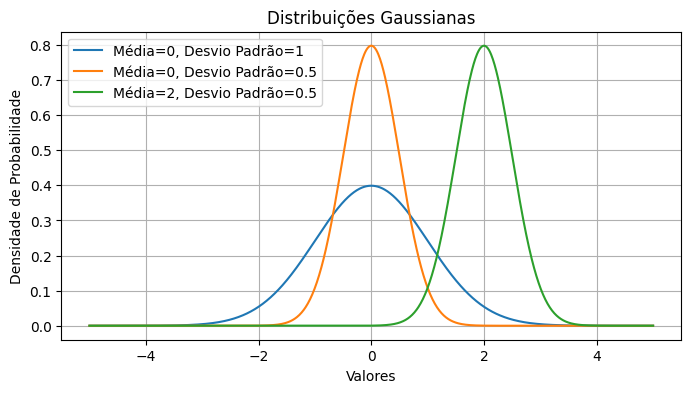

In [49]:
# Plot the distributions
plt.figure(figsize=(8, 4))
plt.plot(x, pdf1, label=f'Média={mean1}, Desvio Padrão={std1}')
plt.plot(x, pdf2, label=f'Média={mean2}, Desvio Padrão={std3}')
plt.plot(x, pdf3, label=f'Média={mean3}, Desvio Padrão={std3}')

plt.title('Distribuições Gaussianas')
plt.xlabel('Valores')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.grid(True)
plt.show()

Vamos supor agora que o var_smoothing é 1, então vou somar 1 ao desvio padrão das 3 curvas:

In [50]:
# Generate data for the x-axis
x = np.linspace(-5, 5, 1000)

In [51]:
# Define the parameters for the three distributions
mean1, std1 = 0, 1
mean2, std2 = 0, 0.5
mean3, std3 = 2, 0.5

In [52]:
# Generate the probability density functions (PDFs)
pdf1 = norm.pdf(x, mean1, std1 + 1)
pdf2 = norm.pdf(x, mean2, std2 + 1)
pdf3 = norm.pdf(x, mean3, std3 + 1)

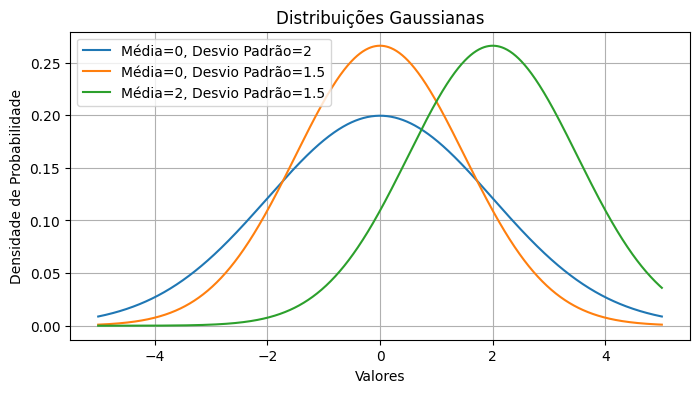

In [53]:
# Plot the distributions
plt.figure(figsize=(8, 4))
plt.plot(x, pdf1, label=f'Média={mean1}, Desvio Padrão={std1 + 1}')
plt.plot(x, pdf2, label=f'Média={mean2}, Desvio Padrão={std2 + 1}')
plt.plot(x, pdf3, label=f'Média={mean3}, Desvio Padrão={std3 + 1}')

plt.title('Distribuições Gaussianas')
plt.xlabel('Valores')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.grid(True)
plt.show()

Treinando o modelo com var_smoothing padrão.

In [54]:
clf.fit(wine.data, wine.target)

,priors,None
,var_smoothing,1e-09


In [56]:
# encontrando a acurácia
accuracy_score(wine.target, clf.predict(wine.data))

0.9887640449438202

===========================================================================================================================